# **Red Wine Quality Classification using Decision Tree**

> **1. Data Pre-processing :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Dataset

df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
# Divide the Dataset into Dependent and Independent Variables

X = df.drop('quality', axis=1)
Y = df['quality']

In [12]:
# Train-test-split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

> **2. Training the Model :**

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
model = classifier.fit(x_train, y_train)

> **3. Predict the Result :**

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
803,6,5
124,5,6
350,6,5
682,5,4
1326,6,6
...,...,...
1259,6,6
1295,5,5
1155,5,5
963,6,6


> **4. Model Evaluation :**

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [19]:
score = accuracy_score(y_test, y_pred)
print(score)

0.575


In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.66      0.70      0.68       130
           6       0.59      0.54      0.56       132
           7       0.44      0.52      0.48        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.57      0.57      0.57       320



In [21]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[ 0  0  1  0  0  0]
 [ 0  0  6  3  1  0]
 [ 1  5 91 28  5  0]
 [ 0  2 36 71 20  3]
 [ 0  1  3 15 22  1]
 [ 0  0  0  3  2  0]]


> **5. Plot the Decision Tree :**

In [22]:
from sklearn import tree

[Text(0.4955694155463082, 0.98, 'x[10] <= 10.525\nentropy = 1.706\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]'),
 Text(0.2815300896286812, 0.94, 'x[9] <= 0.575\nentropy = 1.398\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]'),
 Text(0.13684379001280408, 0.9, 'x[6] <= 98.5\nentropy = 1.217\nsamples = 314\nvalue = [4, 20, 225, 61, 4, 0]'),
 Text(0.09528382415706359, 0.86, 'x[10] <= 9.75\nentropy = 1.338\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]'),
 Text(0.04460093896713615, 0.82, 'x[10] <= 9.075\nentropy = 1.092\nsamples = 165\nvalue = [2, 11, 126, 25, 1, 0]'),
 Text(0.01365770379854887, 0.78, 'x[0] <= 7.8\nentropy = 1.868\nsamples = 11\nvalue = [1, 3, 3, 4, 0, 0]'),
 Text(0.006828851899274435, 0.74, 'x[9] <= 0.515\nentropy = 0.971\nsamples = 5\nvalue = [0, 3, 2, 0, 0, 0]'),
 Text(0.0034144259496372174, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.010243277848911651, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.02048655

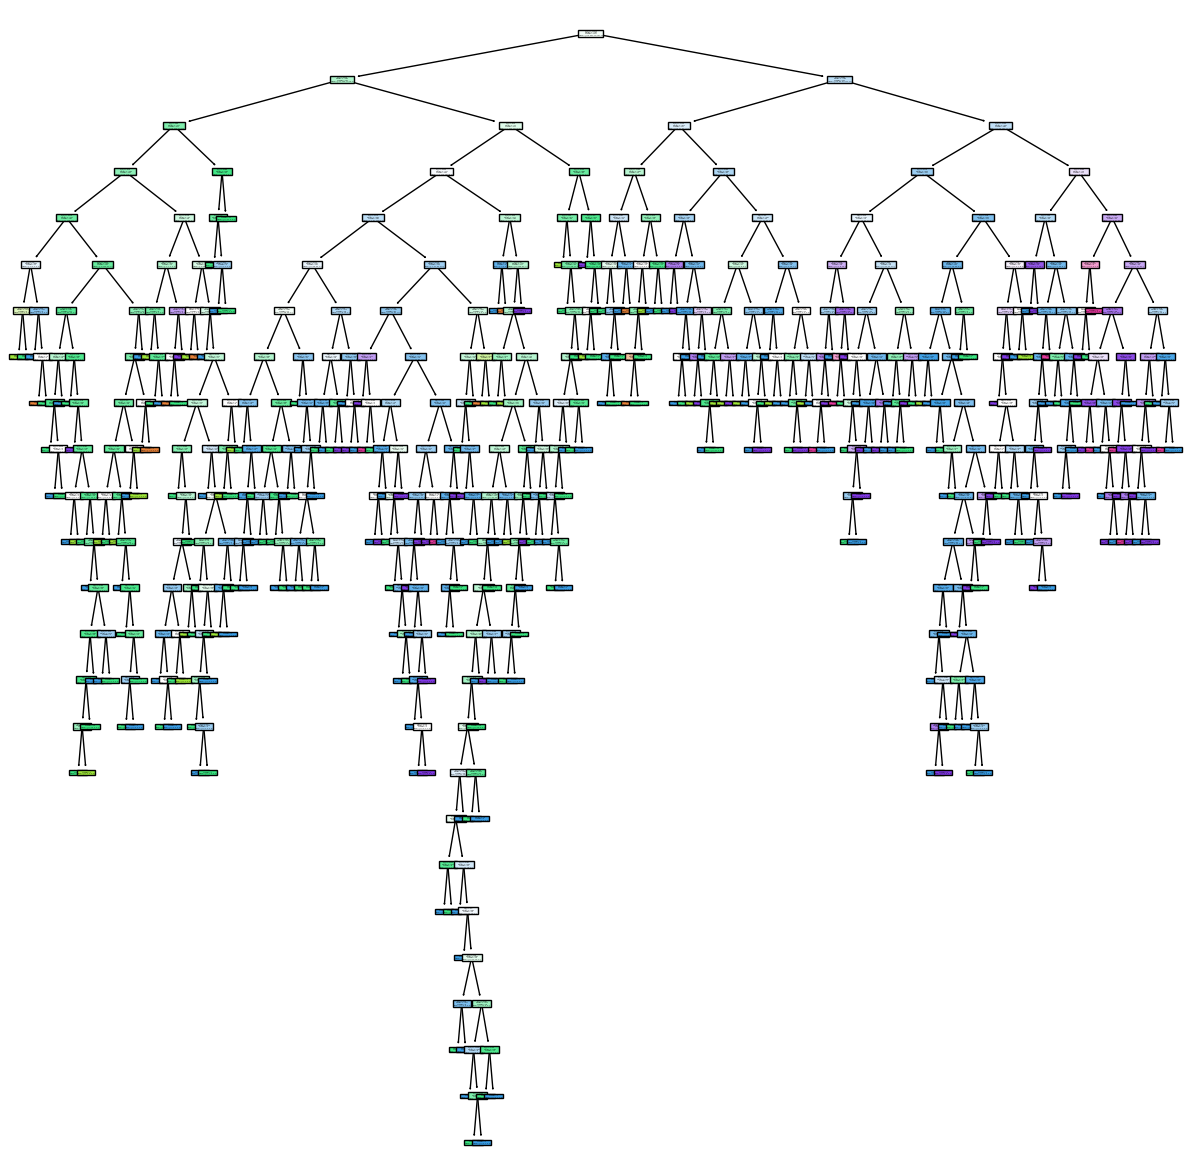

In [23]:
plt.figure(figsize=(15, 15))
tree.plot_tree(model, filled=True)